# Esercizio 9.1

L'esercizio del mercante viaggiatore richiede, dato un numero di città e le relative coordinate, di trovare il percorso più breve affinché il mercante riesca a visitare ogni città una e una sola volta per poi tornare alla città da cui è partito. Dato che i percorsi possibili aumentano all'aumentare del numero n di città come n!, già se si prende in considerazione n uguale a qualche decina risulta impensabile calcolare tutti i possibili percorsi con le relative distanze per vedere quale sia il persorso migliore.
Per questo motivo si utilizza l'algoritmo genetico, che consiste nel generare dei percorsi casuali e dopo una serie di mutazioni si riesce a trovare il persorso migliore.

In particolare in questo problema si sono prese in considerazioni 32 città generate su una circonferenza nel primo caso e all'interno di un quadrato nel secondo caso, e sono stati generati 100 percorsi casuali.

Una volta che si hanno i 100 percorsi, si procede con le mutazioni (si ha un 10% che i percorsi mutino, se no rimangono invariati); le mutazioni sono le seguenti:
-permutazione: vengono prese due città a caso nel percorso e vengono scambiate.
-traslazione: vengono prese m città (dove m è un numero casuale) e traslate di n posizioni (dove n è un numero casuale).
-permutazione contigua: si scambiano m città casuali con altre n città casuali (tutte contigue e con m e n numeri casuali).
-Inversione: venogno invertite m città (dove m è un numero casuale).

Dopo le mutazioni si procede a calcolare la distanza di ogni percorso e a riordinarli secondo quest'ultima, in ordine crescente. Dopo averle riordinate si procede per ottenere una nuova popolazione di 100 percorsi, attraverso il cross-over.
Il cross-over consiste nel prendere due persorsi casualmente (ma con una distribuzione di probabilità che favorisce i percorsi più brevi), si prende un punto di taglio e si riscrivono gli elementi mancanti dopo il punto di taglio nell'ordine in cui compaiono nell'altro vettore. In questo modo si ottengono due nuovi vettori; ripetendo l'operazione per 50 volte si ottiene una nuova popolazione. Una volta selezionati i due vettori, il cross-over ha il 70% di probabilità di avvenire, se no entrambi i vettori entrano direttamente a far parte della nuova popolazione.
Una volta ottenuta la nuova popolazione si ricomincia da capo, finché l'algoritmo non converge e il percorso migliore rimane lo stesso; sono stati effettuati 10000 passi, ma si può osservare dai grafici che già dopo poche centinaia di passi nel caso delle città generate sulla circonferenza, e dopo circa 3000 passi nel caso delle città generate all'interno del quadrato si ottiene il percorso dalla distanza minima.
Di seguito sono anche mostrati i percorsi migliori nei due casi.



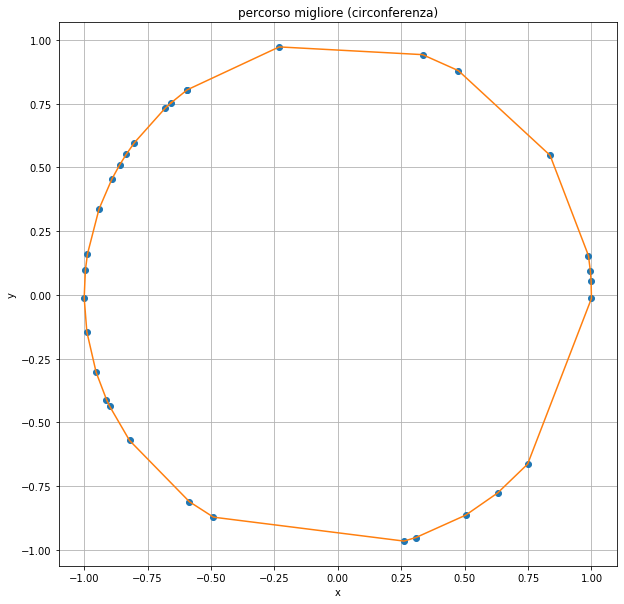

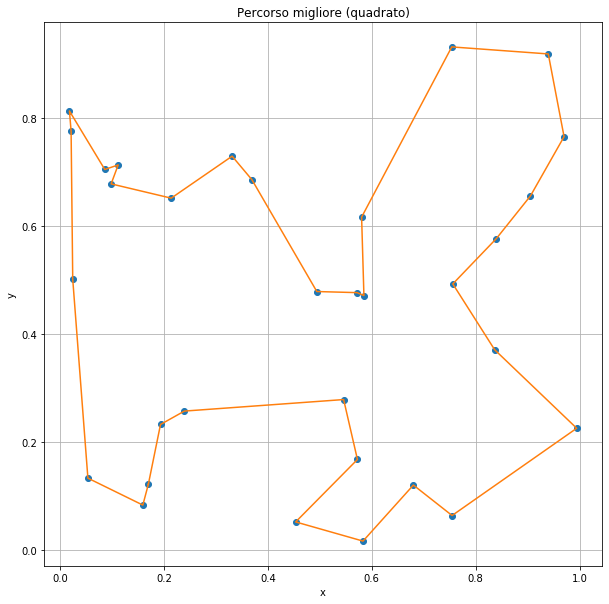

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


p_c=np.loadtxt("percorso_circonferenza.dat")
cfr=np.loadtxt("Città_circonferenza.dat")
p_q=np.loadtxt("percorso_quadrato.dat")
sqr=np.loadtxt("Città_quadrato.dat")

c_x=np.ones(33)
c_y=np.ones(33)
c_x[32]=cfr[0,0]        
c_y[32]=cfr[0,1]
for i in range(32):
    j=int(p_c[i])
    c_x[i]=cfr[j,0]
    c_y[i]=cfr[j,1]
plt.figure(figsize=(10.,10.))
plt.plot(cfr[:,0],cfr[:,1],"o")
plt.plot(c_x,c_y) 
plt.title("percorso migliore (circonferenza)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

q_x=np.ones(33)
q_y=np.ones(33)
q_x[32]=sqr[0,0]           
q_y[32]=sqr[0][1]
for i in range(32):
    j=int(p_q[i])
    q_x[i]=sqr[j,0]
    q_y[i]=sqr[j,1]
plt.figure(figsize=(10.,10.))
plt.plot(sqr[:,0],sqr[:,1],"o")
plt.plot(q_x,q_y) 
plt.title("Percorso migliore (quadrato)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

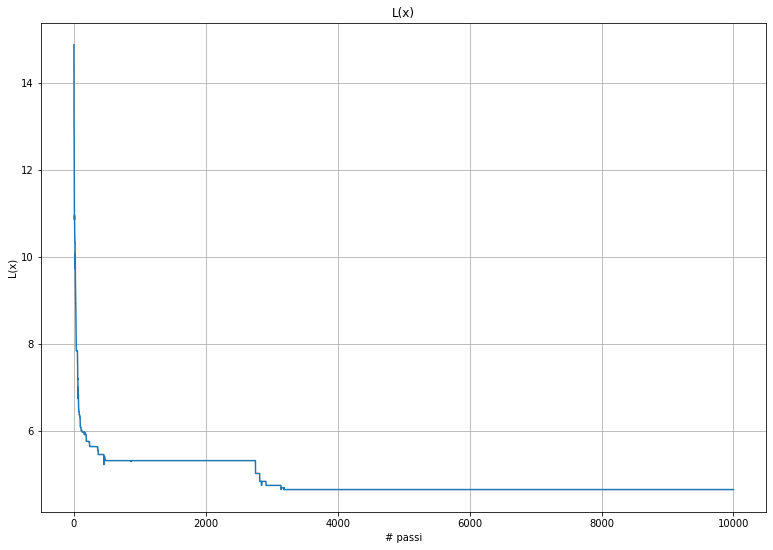

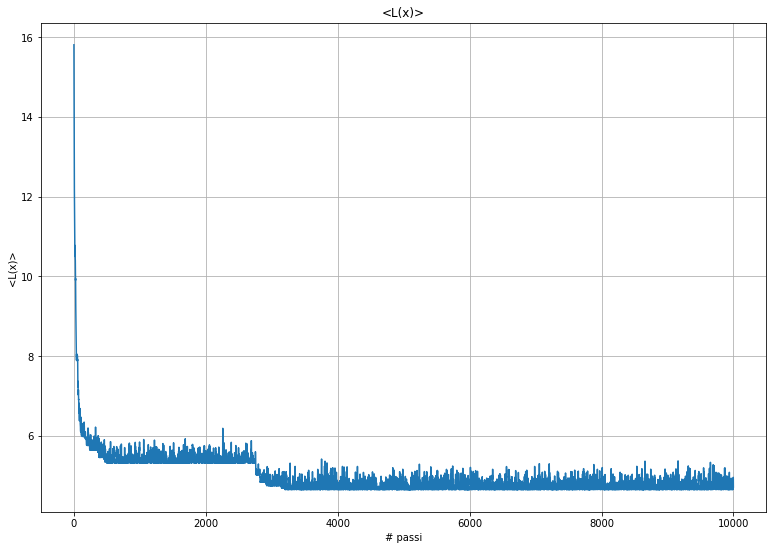

In [35]:
quadrato1=np.loadtxt("1_quadrato.dat")
quadrato50=np.loadtxt("50_quadrato.dat")


x = np.arange(quadrato1.size)
plt.figure(figsize=(13.,9.))
plt.plot(x,quadrato1)
plt.xlabel("# passi")
plt.ylabel("L(x)")
plt.title("L(x)")
plt.grid(True)
plt.show()
plt.figure(figsize=(13.,9.))
plt.plot(x,quadrato50)
plt.xlabel("# passi")
plt.ylabel("<L(x)>")
plt.title("<L(x)>")
plt.grid(True)
plt.show()

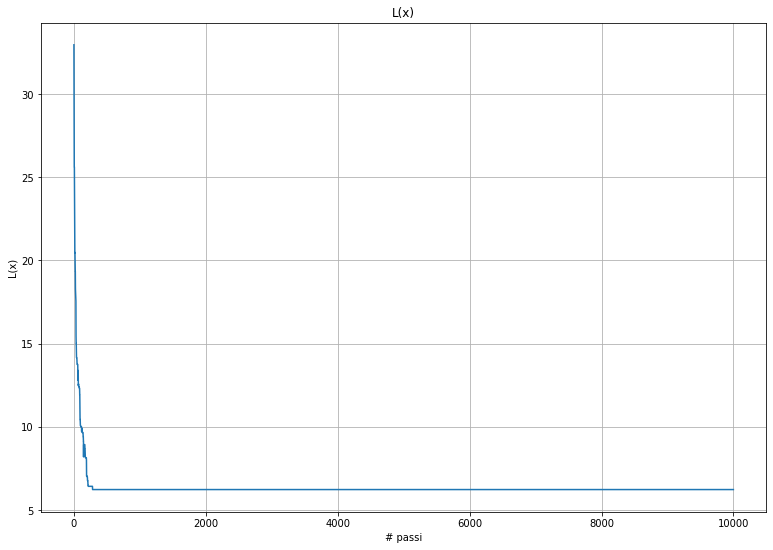

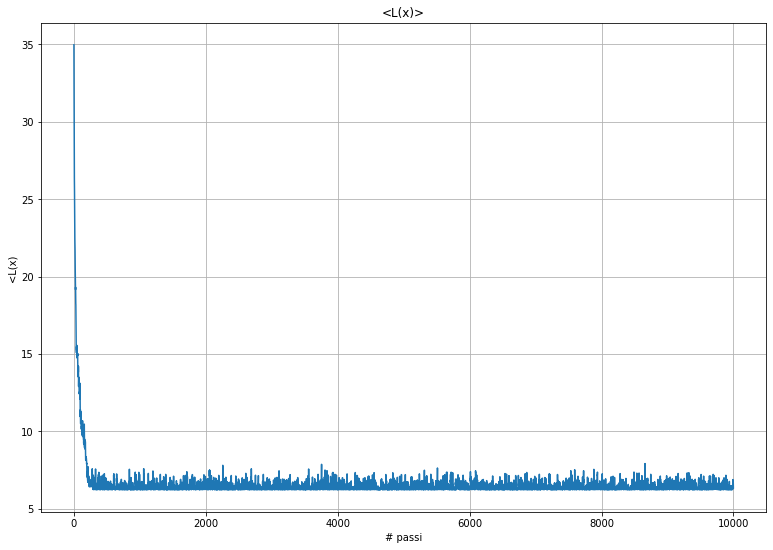

In [39]:
circonferenza1=np.loadtxt("1_circonferenza.dat")
circonferenza50=np.loadtxt("50_circonferenza.dat")

x = np.arange(circonferenza1.size)
plt.figure(figsize=(13.,9.))
plt.plot(x,circonferenza1)
plt.xlabel("# passi")
plt.ylabel("L(x)")
plt.title("L(x)")
plt.grid(True)
plt.show()
plt.figure(figsize=(13.,9.))
plt.plot(x,circonferenza50)
plt.xlabel("# passi")
plt.ylabel("<L(x)")
plt.title("<L(x)>")
plt.grid(True)
plt.show()
